# Hypothesis Testing: Installs vs Rating

## Hypothesis:

__Null Hypothesis (Ho): There is no significant difference between the number of installs an App has and its rating.__

__Alternative Hypothesis (Ha): There is a significant difference between the number of installs an App has and its rating.__

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from datetime import datetime, date
import scipy.stats as stats
import math
import nbimporter
from Helper_Functions import *

%matplotlib inline
sns.set(style = 'darkgrid')

In [3]:
play_store_data = pd.read_csv('../Data/Cleaned_Play_Store_Data.csv')
# Dropping Unnamed Columns
play_store_data.drop(play_store_data.columns[
    play_store_data.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

## Creating Data Frames to Match Hypothesis Testing

In [168]:
# play_store_data.groupby('Installs').count()

In [155]:
# I want to compare Install ranges that are comparible in size
# Thus, I create a groupby that returns the Install ranges with their respective counts
downloads_100 = play_store_data[play_store_data['Installs'] == 100]
downloads_500 = play_store_data[play_store_data['Installs'] == 500]
downloads_1000 = play_store_data[play_store_data['Installs'] == 1000]
downloads_5000 = play_store_data[play_store_data['Installs'] == 5000]
downloads_10000 = play_store_data[play_store_data['Installs'] == 10000]
downloads_50000 = play_store_data[play_store_data['Installs'] == 50000]
downloads_100000 = play_store_data[play_store_data['Installs'] == 100000]
downloads_500000 = play_store_data[play_store_data['Installs'] == 500000]
downloads_1000000 = play_store_data[play_store_data['Installs'] == 1000000]

## Welch's T-Tests

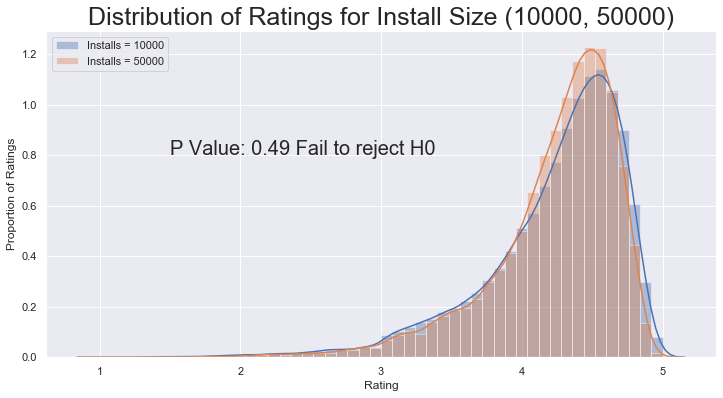

In [171]:
# Comparing Install Sizes of 10000 & 50000, to compare proportion of ratings

fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(downloads_10000.Rating, label = "Installs = 10000")
sns.distplot(downloads_50000.Rating, label = 'Installs = 50000')
plt.ylabel('Proportion of Ratings')
plt.legend()
plt.title('Distribution of Ratings for Install Size (10000, 50000)', fontsize = 25)
s, p = stats.ttest_ind(downloads_10000.Rating, downloads_50000.Rating, equal_var=False)
plt.text(x = 1.5, y = 0.8, s = "P Value: %.2f Fail to reject H0"%(p),fontsize = 20);
# plt.savefig('../graphs/Distribution_of_Ratings_10k_50k.png', dpi = 500, bbox_inches = 'tight');

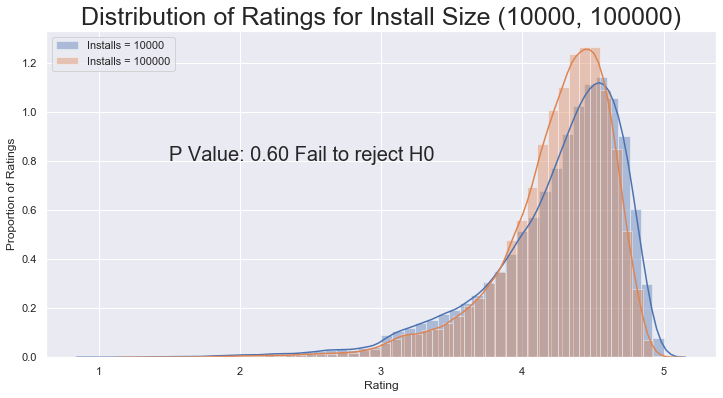

In [170]:
# Comparing Install Sizes of 10000 & 100000, to compare proportion of ratings
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(downloads_10000.Rating,label='Installs = 10000')
sns.distplot(downloads_100000.Rating,label='Installs = 100000')
plt.legend()
plt.ylabel('Proportion of Ratings')
plt.title('Distribution of Ratings for Install Size (10000, 100000)', fontsize = 25)
s, p = stats.ttest_ind(downloads_10000.Rating, downloads_100000.Rating, equal_var=False)
plt.text(x = 1.5, y = 0.8, s = "P Value: %.2f Fail to reject H0"%(p),fontsize = 20);
# plt.savefig('../graphs/Distribution_of_Ratings_10k_100k.png', dpi = 500, bbox_inches = 'tight');

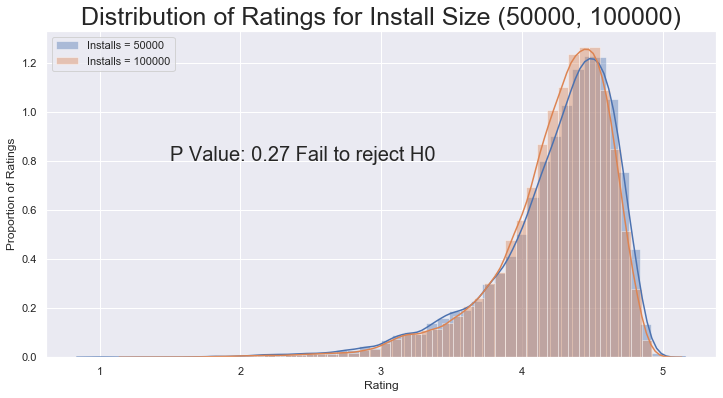

In [152]:
# Comparing Install Sizes of 50000 & 100000, to compare proportion of ratings
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(downloads_50000.Rating,label='Installs = 50000')
sns.distplot(downloads_100000.Rating,label='Installs = 100000')
plt.legend()
plt.ylabel('Proportion of Ratings')
plt.title('Distribution of Ratings for Install Size (50000, 100000)', fontsize = 25)
s, p = stats.ttest_ind(downloads_50000.Rating, downloads_100000.Rating, equal_var=False)
plt.text(x = 1.5, y = 0.8, s = "P Value: %.2f Fail to reject H0"%(p),fontsize = 20);
# plt.savefig('../graphs/Distribution_of_Ratings_50k_100k.png', dpi = 500, bbox_inches = 'tight');

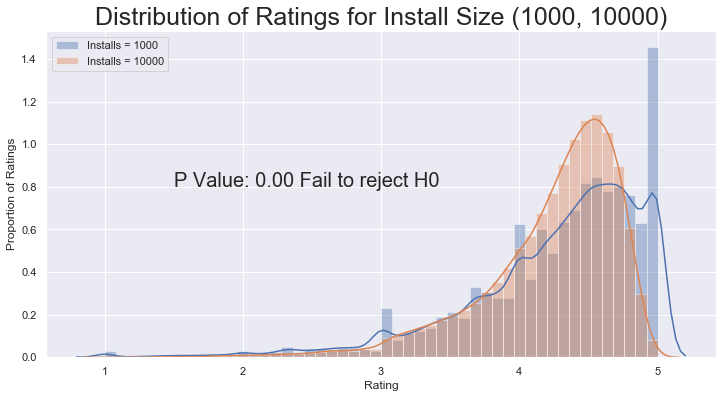

In [169]:
# Comparing Install Sizes of 1000 & 10000, to compare proportion of ratings
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(downloads_1000.Rating,label='Installs = 1000')
sns.distplot(downloads_10000.Rating,label='Installs = 10000')
plt.legend()
plt.ylabel('Proportion of Ratings')
plt.title('Distribution of Ratings for Install Size (1000, 10000)', fontsize = 25)
s, p = stats.ttest_ind(downloads_1000.Rating, downloads_10000.Rating, equal_var=False)
plt.text(x = 1.5, y = 0.8, s = "P Value: %.2f Fail to reject H0"%(p),fontsize = 20);
# plt.savefig('../graphs/Distribution_of_Ratings_1k_10k.png', dpi = 500, bbox_inches = 'tight');

### Further Analysis / EDA

In [269]:
# Calculating percentage of each review per level of install
percentage_list_1000 = []
for i in downloads_1000.Rating.value_counts().sort_values():
    percentage_list.append(i/ downloads_1000.shape[0])
    
percentage_list_10000 = []
for i in downloads_10000.Rating.value_counts().sort_values():
    percentage_list_10000.append(i/ downloads_10000.shape[0])


# Initializing a dataframe that is used for depicting percentage of ratings per level of installs (1000, 10000)
df = pd.DataFrame({'rating': [1.0, 2.0, 3.0, 4.0, 5.0],
                   'installs_10000': [0.0, 0.1, 0.08, 0.56, 0.35],
                   'installs_1000': [0.0, 0.02, 0.09, 0.46, 0.43]},
                   columns = ["rating","installs_1000", 'installs_10000'])
df1 = df.melt('rating', var_name = 'a', value_name = 'b')

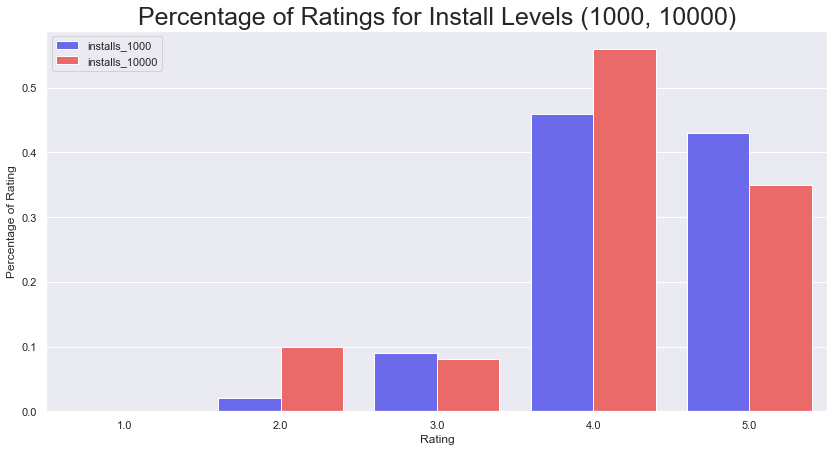

In [274]:
# Comparing Install Sizes of 1000 & 10000, to compare percentage of ratings
fig, ax = plt.subplots(figsize = (14,7))
sns.barplot(x = 'rating', y = 'b', hue = 'a', data = df1, palette='seismic')
plt.title('Percentage of Ratings for Install Levels (1000, 10000)', fontsize = 25)
plt.ylabel('Percentage of Rating')
plt.xlabel('Rating')
plt.legend(loc='upper left')
plt.savefig('../graphs/Percentage_of_Ratings_1k_10k.png', dpi = 500, bbox_inches = 'tight');

In [261]:
downloads_100.Rating = downloads_100.Rating.round(0)
# Calculating percentage of each review per level of install
percentage_list_100 = []
for i in downloads_100.Rating.value_counts().sort_values():
    percentage_list_100.append(i/ downloads_100.shape[0])
percentage_list_100


# Initializing a dataframe that is used for depicting percentage of ratings per level of installs (1000, 10000)
df = pd.DataFrame({'rating': [1.0, 2.0, 3.0, 4.0, 5.0],
                   'installs_10000': [0.0, 0.1, 0.08, 0.56, 0.35],
                   'installs_100': [0.03, 0.03, 0.07, 0.26, 0.61]},
                   columns = ["rating","installs_100", 'installs_10000'])
df1 = df.melt('rating', var_name = 'a', value_name = 'b')

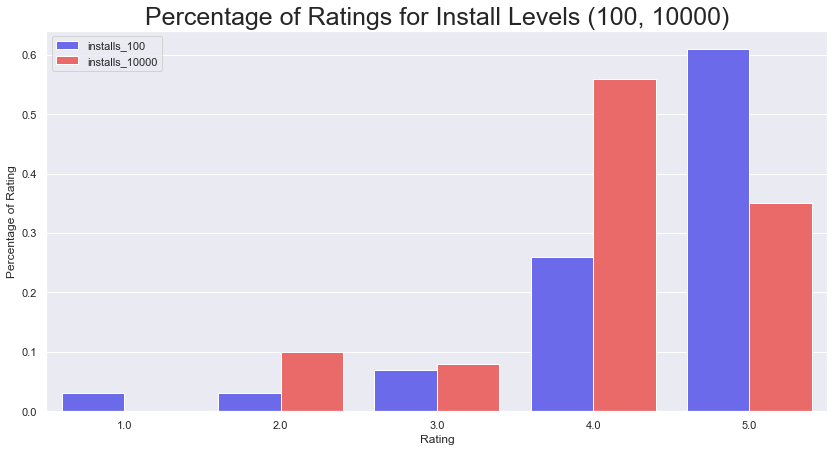

In [267]:
# Comparing Install Sizes of 1000 & 10000, to compare percentage of ratings
fig, ax = plt.subplots(figsize = (14,7))
sns.barplot(x = 'rating', y = 'b', hue = 'a', data = df1, palette='seismic')
plt.title('Percentage of Ratings for Install Levels (100, 10000)', fontsize = 25)
plt.ylabel('Percentage of Rating')
plt.xlabel('Rating')
plt.legend();
# plt.savefig('../graphs/Percentage_of_Ratings_100_10k.png', dpi = 500, bbox_inches = 'tight');

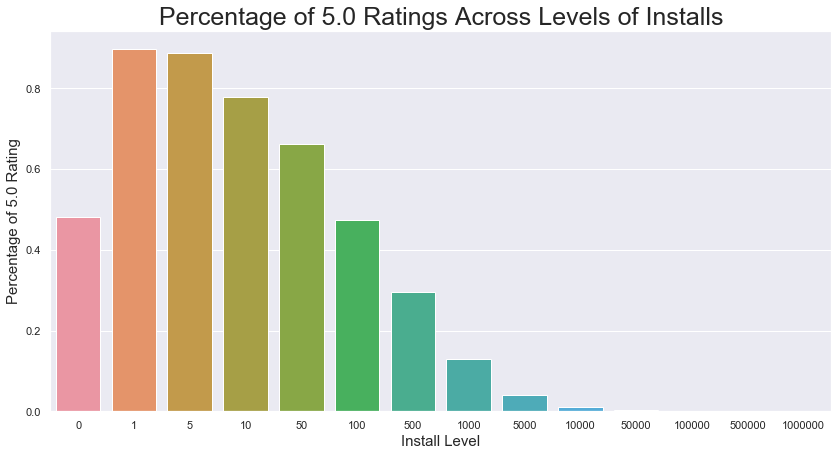

In [299]:
rating_5 = play_store_data[play_store_data['Rating'] >= 4.9]
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x=[0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000,
               500000, 1000000], y=[(25/52), (393/438), (583/657), (3383/4351), 
                                    (2504/3777), (8550/18062), (4000/13528), 
                                    (6157/47233), (1014/25304), (582/57630), (51/21414),
                                    (53/34665), (10/8856), (5/11099)])
plt.title('Percentage of 5.0 Ratings Across Levels of Installs', fontsize = 25)
plt.xlabel('Install Level',fontsize = 15)
plt.ylabel('Percentage of 5.0 Rating', fontsize = 15);
# plt.savefig('../graphs/Percentage_of_5_Rating_Across_Installs.png', dpi = 500, bbox_inches = 'tight')